In [125]:


import numpy as np

#Set the `numpy` pseudo-random generator at a fixed value
#This helps with repeatable results everytime you run the code. 
np.random.seed(1000)

import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
from tensorflow import keras

os.environ['KERAS_BACKEND'] = 'tensorflow' # Added to set the backend as Tensorflow
#We can also set it to Theano if we want. 


#Iterate through all images in Parasitized folder, resize to 64 x 64
#Then save as numpy array with name 'dataset'
#Set the label to this as 0

image_directory = 'cell_images/'
SIZE = 64
dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
label = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.

parasitized_images = os.listdir(image_directory + 'Parasitized/')

for i, image_name in enumerate(parasitized_images):    #Remember enumerate method adds a counter and returns the enumerate object
    
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'Parasitized/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [126]:
# import os
# # #full path.
# # dir_path = os.path.dirname(os.path.realpath())
# # print(dir_path)
# #current dir.
# cwd = os.getcwd()
# print(cwd)

# print(os.listdir('/home/system11-user3/Desktop/AS/cell_images/Parasitized/'))

In [127]:


#Iterate through all images in Uninfected folder, resize to 64 x 64
#Then save into the same numpy array 'dataset' but with label 1

uninfected_images = os.listdir(image_directory + 'Uninfected/')
for i, image_name in enumerate(uninfected_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'Uninfected/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)


#Apply CNN
# ### Build the model

#############################################################
###2 conv and pool layers. with some normalization and drops in between.

INPUT_SHAPE = (SIZE, SIZE, 3)   #change to (SIZE, SIZE, 3)
inp = keras.layers.Input(shape=INPUT_SHAPE)

conv1 = keras.layers.Conv2D(32, kernel_size=(3, 3), 
                               activation='relu', padding='same')(inp)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
norm1 = keras.layers.BatchNormalization(axis = -1)(pool1)
drop1 = keras.layers.Dropout(rate=0.2)(norm1)
conv2 = keras.layers.Conv2D(32, kernel_size=(3, 3), 
                               activation='relu', padding='same')(drop1)
pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
norm2 = keras.layers.BatchNormalization(axis = -1)(pool2)
drop2 = keras.layers.Dropout(rate=0.2)(norm2)

flat = keras.layers.Flatten()(drop2)  #Flatten the matrix to get it ready for dense.

hidden1 = keras.layers.Dense(512, activation='relu')(flat)
norm3 = keras.layers.BatchNormalization(axis = -1)(hidden1)
drop3 = keras.layers.Dropout(rate=0.2)(norm3)
hidden2 = keras.layers.Dense(256, activation='relu')(drop3)
norm4 = keras.layers.BatchNormalization(axis = -1)(hidden2)
drop4 = keras.layers.Dropout(rate=0.2)(norm4)

out = keras.layers.Dense(2, activation='sigmoid')(drop4)   #units=1 gives error

model = keras.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam',
                loss='categorical_crossentropy',   #Check between binary_crossentropy and categorical_crossentropy
                metrics=['accuracy'])
print(model.summary())
    


Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_28 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0   

In [128]:
    
###############################################################    
    
 ### Split the dataset
# 
# I split the dataset into training and testing dataset.
# 1. Training data: 80%
# 2. Testing data: 20%
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20, random_state = 0)

# When training with Keras's Model.fit(), adding the tf.keras.callback.TensorBoard callback 
# ensures that logs are created and stored. Additionally, enable histogram computation 
#every epoch with histogram_freq=1 (this is off by default)
#Place the logs in a timestamped subdirectory to allow easy selection of different training runs.

#import datetime

#log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d_%H%M%S") + "/"
#tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


# ### Training the model
# As the training data is now ready, I will use it to train the model.   

#Fit the model

In [129]:
# !conda install scikit-learn

In [130]:
# X_train = X
# Y_train = Y
# X_test = X
# Y_test = Y
from random import random
def eval_ratios(sx_train_g, sx_train_b, y_train_g, y_train_b, model):
    test_g = model.test_on_batch(sx_train_g,y_train_g)
    test_b = model.test_on_batch(sx_train_b,y_train_b)
    negl = random()
    if negl < 0.9: 
        return 1-test_g[1] + 0.4, 1-test_b[1] + 0.4 
    else:
        return random(), random()
    
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
import numpy as np



In [131]:
    
scaled_x_train = np.array( X_train)
# scaled_x_train = np.asarray(scaled_x_train).astype('float32')

y_train = np.array(y_train).astype('float32')

scaled_x_test = np.array(X_test)
scaled_x_test = np.asarray(scaled_x_test).astype('float32')

y_test = np.array(y_test).astype('float32')
batch_size = 64


print(y_train[0])
print(y_train.T[0])

[0. 1.]
[0. 1. 1. ... 1. 1. 1.]


In [132]:

sx_train_g = scaled_x_train[ y_train.T[0]==1 ]
sx_train_b = scaled_x_train[ y_train.T[1]==1 ]
y_train_g = y_train[ y_train.T[0]==1.0 ]
y_train_b = y_train[ y_train.T[1]==1.0 ]




In [133]:
# print(sx_train_g[0])

In [134]:
print(len(sx_train_g))

11076


In [135]:
from datetime import datetime
print(" Start: ", datetime.now())

 Start:  2022-05-10 12:12:04.259412


In [136]:

import math
# Train
train_error_hist = list()
test_error_hist = list()
test_acc_hist = list()

itr = 0
n_batches = math.ceil(len(scaled_x_train) / batch_size)


ratio_g = 1
ratio_b = 1
best_model = model
best_acc = 0.1
best_index = 0
savepath = 'origCNNpathlolol'

# sample_weight = np.random.rand(len(X_train_g[0]))

while itr < 2:
    
    ptr_g = 0
    ptr_b = 0

    allot_num_g = 1
    allot_num_b = 1

    for i in range(n_batches):
        
        allot_num_g = ( ratio_g / (ratio_g + ratio_b) )*batch_size
        allot_num_g = (int)(allot_num_g)
        allot_num_b = batch_size - allot_num_g

        X_batch = sx_train_g[ ptr_g: ptr_g+allot_num_g ]
        tempp = sx_train_b[ ptr_b: ptr_b+allot_num_b]
        #         print("   ", len(X_batch), len(tempp))
        y_batch = y_train_g[ ptr_g: ptr_g+allot_num_g]
        tempp1 = y_train_b[ ptr_b: ptr_b+allot_num_b]

        if len(X_batch)==0:
            ptr_g=0
        elif len(tempp)==0:
            ptr_b=0
        X_batch = np.concatenate([X_batch, tempp])        
        y_batch = np.concatenate([y_batch, tempp1])
        loss = model.train_on_batch(X_batch, y_batch)

        train_error_hist.append(loss[0])
        
        loss1 = model.test_on_batch(scaled_x_test, y_test)
        test_error_hist.append(loss1[0])
        test_acc_hist.append(loss1[1])
        if loss1[1] > best_acc and loss1[1] > 0.75:
            best_acc = loss1[1]
            model.save(savepath)
            best_model = keras.models.load_model(savepath)
        print("________________",i, loss1[1])
        ratio_g, ratio_b = eval_ratios(sx_train_g[:1024], sx_train_b[:1024], y_train_g[:1024], y_train_b[:1024], model)
#         ratio_g = 1
#         ratio_b = 1
#         print(ratio_g, ratio_b)
        ptr_b+=allot_num_b
        ptr_g+=allot_num_g
    
    itr = itr+1

# model.fit(x=scaled_x_train, y=y_train, epochs=iterations, validation_split=validation_split, batch_size=batch_size)


________________ 0 0.5097968
________________ 1 0.50961536
________________ 2 0.51342523
________________ 3 0.5883527
________________ 4 0.5676705
________________ 5 0.49709725
________________ 6 0.49056605
________________ 7 0.4902032
________________ 8 0.4903846
________________ 9 0.4903846
________________ 10 0.49056605
________________ 11 0.4903846
________________ 12 0.4909289
________________ 13 0.49129173
________________ 14 0.51560235
________________ 15 0.5569666
________________ 16 0.5562409
________________ 17 0.5576923
________________ 18 0.56222785
________________ 19 0.5703919
________________ 20 0.58581275
________________ 21 0.5821843
________________ 22 0.57529026
________________ 23 0.5660377
________________ 24 0.55805516
________________ 25 0.55079824
________________ 26 0.54100144
________________ 27 0.53610307
________________ 28 0.5330189
________________ 29 0.5324746
________________ 30 0.532656
________________ 31 0.53610307
________________ 32 0.53846157
_____

INFO:tensorflow:Assets written to: origCNNpathlolol/assets
________________ 199 0.7766691
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
INFO:tensorflow:Assets written to: origCNNpathlolol/assets
________________ 200 0.78120464
________________ 201 0.77812046
________________ 202 0.7637881
________________ 203 0.758164
________________ 204 0.72623366
________________ 205 0.6933962
________________ 206 0.66055876
________________ 207 0.6418723
________________ 208 0.6242743
________________ 209 0.6097605
________________ 210 0.6144775
________________ 211 0.6159289
________________ 212 0.6199202
________________ 213 0.

________________ 16 0.7708636
________________ 17 0.7677794
________________ 18 0.75961536
________________ 19 0.75417274
________________ 20 0.7507257
________________ 21 0.7503629
________________ 22 0.7556241
________________ 23 0.758164
________________ 24 0.7645138
________________ 25 0.7775762
________________ 26 0.7866473
________________ 27 0.80206823
________________ 28 0.8147678
________________ 29 0.8254717
________________ 30 0.8321843
________________ 31 0.83236575
________________ 32 0.82964444
________________ 33 0.8298258
________________ 34 0.8301887
________________ 35 0.8305515
________________ 36 0.8258346
________________ 37 0.8149492
________________ 38 0.79825836
________________ 39 0.7837446
________________ 40 0.76977503
________________ 41 0.7601597
________________ 42 0.76269954
________________ 43 0.76832366
________________ 44 0.77068216
________________ 45 0.77576196
________________ 46 0.78955007
________________ 47 0.79843974
________________ 48 0.812409

INFO:tensorflow:Assets written to: origCNNpathlolol/assets
________________ 142 0.8789913
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
INFO:tensorflow:Assets written to: origCNNpathlolol/assets
________________ 143 0.88534105
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'te

INFO:tensorflow:Assets written to: origCNNpathlolol/assets
________________ 184 0.91763425
________________ 185 0.91182876
________________ 186 0.9065675
________________ 187 0.90221334
________________ 188 0.8985849
________________ 189 0.89060235
________________ 190 0.8871553
________________ 191 0.8862482
________________ 192 0.8851597
________________ 193 0.884434
________________ 194 0.883164
________________ 195 0.8829826
________________ 196 0.8828012
________________ 197 0.8837083
________________ 198 0.88425255
________________ 199 0.883164
________________ 200 0.87917274
________________ 201 0.8789913
________________ 202 0.8798984
________________ 203 0.8817126
________________ 204 0.89568216
________________ 205 0.9040276
________________ 206 0.91219157
________________ 207 0.91763425
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorf

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
INFO:tensorflow:Assets written to: origCNNpathlolol/assets
________________ 312 0.92978954
________________ 313 0.92706823
________________ 314 0.92561686
________________ 315 0.9230769
________________ 316 0.9210813
________________ 317 0.9210813
________________ 318 0.920537
________________ 319 0.9179971
________________ 320 0.9174528
________________ 321 0.91527575
________________ 322 0.912373
________________ 323 0.9074746
________________ 324 0.9063861
________________ 325 0.9056604
________________ 326 0.9051161
________________ 327 0.90620464
________________ 328 0.90947026
________________ 329 0.912373
________________ 330 0.91364294
________________ 331 0.91128445
________________ 332 0.91364294
________________ 333 0.9156386
________________ 334 0.91727144
__________

In [137]:
print(" End: ", datetime.now())
print(max(test_acc_hist))
print(test_acc_hist[-1])

 End:  2022-05-10 12:22:49.475788
0.92978954
0.9190856


In [138]:

# history = model.fit(np.array(X_train), 
#                          y_train, 
#                          batch_size = 64, 
#                          verbose = 1, 
#                          epochs = 5,      #Changed to 3 from 50 for testing purposes.
#                          validation_split = 0.1,
#                          shuffle = False
#                       #   callbacks=callbacks
#                      )

# history = model.train_on_batch(np.array(X_train[:128]),y_train[:128])


'\nfrom keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout\nfrom keras.models import Sequential\nmodel = None\nmodel = Sequential()\nmodel.add(Convolution2D(32, (3, 3), input_shape = (SIZE, SIZE, 3), activation = \'relu\', data_format=\'channels_last\'))\nmodel.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))\nmodel.add(BatchNormalization(axis = -1))\nmodel.add(Dropout(0.2))\nmodel.add(Convolution2D(32, (3, 3), activation = \'relu\'))\nmodel.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))\nmodel.add(BatchNormalization(axis = -1))\nmodel.add(Dropout(0.2))\nmodel.add(Flatten())\nmodel.add(Dense(activation = \'relu\', units=512))\nmodel.add(BatchNormalization(axis = -1))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(activation = \'relu\', units=256))\nmodel.add(BatchNormalization(axis = -1))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(activation = \'sigmoid\', units=2))\nmodel.compile(optimizer = \'adam\', loss = \'c

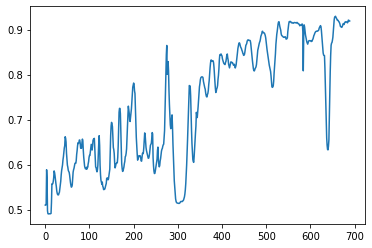

In [139]:

# ## Accuracy calculationany
# 
# I'll now calculate the accuracy on the test data.
plt.plot(test_acc_hist)
# print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))




# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
# t = f.suptitle('CNN Performance', fontsize=12)
# f.subplots_adjust(top=0.85, wspace=0.3)

# max_epoch = len(history.history['accuracy'])+1
# epoch_list = list(range(1,max_epoch))
# ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
# ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
# ax1.set_xticks(np.arange(1, max_epoch, 5))
# ax1.set_ylabel('Accuracy Value')
# ax1.set_xlabel('Epoch')
# ax1.set_title('Accuracy')
# l1 = ax1.legend(loc="best")

# ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
# ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
# ax2.set_xticks(np.arange(1, max_epoch, 5))
# ax2.set_ylabel('Loss Value')
# ax2.set_xlabel('Epoch')
# ax2.set_title('Loss')
# l2 = ax2.legend(loc="best")


#Save the model
# model.save('malaria_cnn.h5')

################################################
### ANOTHER WAY TO DEFINE THE NETWORK using Sequential model
#Sequential 
#You can create a Sequential model by passing a list of layer instances to the constructor:
"""
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential
model = None
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape = (SIZE, SIZE, 3), activation = 'relu', data_format='channels_last'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Convolution2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(activation = 'relu', units=512))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Dense(activation = 'relu', units=256))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Dense(activation = 'sigmoid', units=2))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model.summary())
"""

In [140]:
from sklearn.metrics import confusion_matrix,classification_report
# # with as
predictions = best_model.predict(scaled_x_test)
predictions=np.argmax(predictions,axis=1)
print(classification_report(y_test.T[1], predictions))

# print(y_test.T[1],predictions)
# for i in range(100):
#     print(predictions[i],y_test.T[1][i] )


              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      2703
         1.0       0.94      0.92      0.93      2809

    accuracy                           0.93      5512
   macro avg       0.93      0.93      0.93      5512
weighted avg       0.93      0.93      0.93      5512



In [141]:
from sklearn.metrics import classification_report, confusion_matrix

def myfunc(x):
    if x[0] > x[1]:
        return 1
    return 0

y_pred = best_model.predict(scaled_x_test)
# print(yas_pred)
# yas_pred = np.argmax(yas_pred)
# print(yas_pred)

# print(y_test)
for i in range(len(y_pred)):
#     print(y_pred[i])
    y_pred[i] = myfunc(y_pred[i])
    y_test[i] = myfunc(y_test[i])
# print(y_pred)
print(classification_report(y_test.T[0], y_pred.T[0]))
# print(y_test, y_pred)
print(confusion_matrix(y_test.T[0], y_pred.T[0]))
# print(y_pred.T[0])



              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      2809
         1.0       0.92      0.94      0.93      2703

    accuracy                           0.93      5512
   macro avg       0.93      0.93      0.93      5512
weighted avg       0.93      0.93      0.93      5512

[[2590  219]
 [ 168 2535]]


In [142]:
print(model)

In [143]:
print(best_model)

In [144]:
print(test_acc_hist)

[0.5097968, 0.50961536, 0.51342523, 0.5883527, 0.5676705, 0.49709725, 0.49056605, 0.4902032, 0.4903846, 0.4903846, 0.49056605, 0.4903846, 0.4909289, 0.49129173, 0.51560235, 0.5569666, 0.5562409, 0.5576923, 0.56222785, 0.5703919, 0.58581275, 0.5821843, 0.57529026, 0.5660377, 0.55805516, 0.55079824, 0.54100144, 0.53610307, 0.5330189, 0.5324746, 0.532656, 0.53610307, 0.53846157, 0.54698837, 0.554971, 0.56313497, 0.5769231, 0.5867199, 0.5934325, 0.5990566, 0.6101234, 0.6171988, 0.62681425, 0.6367925, 0.6418723, 0.66182876, 0.6587446, 0.64985484, 0.6253629, 0.61338896, 0.59887516, 0.5941582, 0.5872642, 0.5845428, 0.58291, 0.5769231, 0.5683962, 0.55986935, 0.55370104, 0.54970974, 0.55079824, 0.5544267, 0.5689405, 0.58309144, 0.5883527, 0.5916183, 0.5974238, 0.6021408, 0.6034107, 0.60268503, 0.60867196, 0.6222787, 0.6306241, 0.6415094, 0.64840347, 0.64677066, 0.6485849, 0.6543904, 0.65457183, 0.64731497, 0.63661104, 0.63751817, 0.6362482, 0.64876634, 0.6565675, 0.65312046, 0.6317126, 0.616654